### Importing relavent libraries


In [566]:
import pandas as pd
import numpy as np

In [567]:
# Load the dataset
df = pd.read_csv("../Datasets/Marketing campaign dataset.csv")

In [568]:
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [569]:
print(df.dtypes)

campaign_item_id         int64
no_of_days               int64
time                    object
ext_service_id           int64
ext_service_name        object
creative_id              int64
creative_width         float64
creative_height        float64
search_tags             object
template_id            float64
landing_page            object
advertiser_id            int64
advertiser_name         object
network_id               int64
approved_budget        float64
advertiser_currency     object
channel_id               int64
channel_name            object
max_bid_cpm            float64
network_margin         float64
campaign_budget_usd    float64
impressions              int64
clicks                   int64
stats_currency          object
currency_code           object
exchange_rate            int64
media_cost_usd         float64
position_in_content    float64
unique_reach           float64
total_reach            float64
search_tag_cat          object
cmi_currency_code       object
timezone

#### Check for null values

In [570]:
print(df.isnull().sum(), len(df))

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

#### Removing unneeded columns

In [571]:
df = df.drop(columns=['total_reach','unique_reach','position_in_content',
                      'max_bid_cpm','network_margin','approved_budget',
                      'exchange_rate','stats_currency','advertiser_currency',
                      'cmi_currency_code','landing_page', 'time', 'impressions'])

## Creative

#### Changing the creative columns to one column

In [572]:
df['creative_height'].unique()
df['creative_width'].unique()

array([300.,   0.,  nan])

In [573]:
df['creative_dimension'] = df['creative_height'] * df['creative_width']
df = df.drop(columns=['creative_height','creative_width'])

In [574]:
print(df.isnull().sum(), len(df))

campaign_item_id          0
no_of_days                0
ext_service_id            0
ext_service_name          0
creative_id               0
search_tags               0
template_id            3412
advertiser_id             0
advertiser_name           0
network_id                0
channel_id                0
channel_name              0
campaign_budget_usd       0
clicks                    0
currency_code             0
media_cost_usd            0
search_tag_cat            0
timezone                  0
weekday_cat               0
keywords                  0
creative_dimension     3412
dtype: int64 72612


## Template

In [575]:
df['template_id'].unique()

array([90., 23., 92., 89., 93., nan])

##### Leaving template as it is

## Creative


In [576]:
df['creative_dimension'].unique()

array([75000.,     0.,    nan])

In [577]:
df['creative_dimension'] = (df['creative_dimension'] == 75000).astype(int)
print(df)

       campaign_item_id  no_of_days  ext_service_id ext_service_name  \
0                  2733           7             128     Facebook Ads   
1                  2733           8              16            DV360   
2                  2733           9             128     Facebook Ads   
3                  2733          10             128     Facebook Ads   
4                  2733          11               4       Google Ads   
...                 ...         ...             ...              ...   
72607              3567          11               4       Google Ads   
72608              3567          12             128     Facebook Ads   
72609              3567          13             128     Facebook Ads   
72610              3567          14               4       Google Ads   
72611              3567          15              16            DV360   

       creative_id                               search_tags  template_id  \
0             1000                           #The Power of

In [578]:
# Remove rows where 'creative_dimension' is null (NaN)
df = df.dropna(subset=['creative_dimension'])

# Check the cleaned dataframe
print(df.head())

   campaign_item_id  no_of_days  ext_service_id ext_service_name  creative_id  \
0              2733           7             128     Facebook Ads         1000   
1              2733           8              16            DV360         1000   
2              2733           9             128     Facebook Ads         1000   
3              2733          10             128     Facebook Ads         1000   
4              2733          11               4       Google Ads         1000   

                          search_tags  template_id  advertiser_id  \
0                     #The Power of X         90.0           4756   
1                      #Be Bold. Be X         90.0           4756   
2  #Embrace Your Individuality with X         90.0           4756   
3                      #Be Bold. Be X         90.0           4756   
4                      #Be Bold. Be X         90.0           4756   

  advertiser_name  network_id  ...  channel_name campaign_budget_usd  clicks  \
0             Web 

In [579]:
# Convert 'creative_dimension' to a binary feature
df['has_image'] = df['creative_dimension'].apply(lambda x: 1 if x == 75000 else 0)

# Check the transformation
print(df['has_image'].value_counts())

has_image
0    72612
Name: count, dtype: int64


In [580]:
# Drop rows with any null values
df = df.dropna()

# Verify if null values are removed
print(df.isnull().sum())
print(f"✅ Rows with null values have been removed. Remaining rows: {len(df)}")


campaign_item_id       0
no_of_days             0
ext_service_id         0
ext_service_name       0
creative_id            0
search_tags            0
template_id            0
advertiser_id          0
advertiser_name        0
network_id             0
channel_id             0
channel_name           0
campaign_budget_usd    0
clicks                 0
currency_code          0
media_cost_usd         0
search_tag_cat         0
timezone               0
weekday_cat            0
keywords               0
creative_dimension     0
has_image              0
dtype: int64
✅ Rows with null values have been removed. Remaining rows: 69200


## Campaign id

In [581]:
df['campaign_item_id'].unique()

array([2733, 2766, 2802, 2850, 2851, 2879, 3223, 3054, 3132, 3150, 3149,
       3157, 3153, 3154, 3222, 3220, 3221, 3219, 3173, 3166, 3164, 3165,
       2934, 2949, 2950, 2952, 2977, 2980, 2982, 3033, 3034, 3035, 3038,
       3039, 3040, 3041, 3050, 3042, 3052, 3053, 3055, 3056, 3045, 3046,
       3047, 3048, 3049, 3051, 3057, 3058, 3098, 3099, 3100, 3101, 3102,
       3103, 3104, 3107, 3129, 3130, 3131, 3127, 3128, 3133, 3134, 3147,
       3148, 3151, 3152, 3155, 3156, 3158, 3159, 3160, 3161, 3162, 3163,
       3167, 3168, 3169, 3170, 3171, 3172, 3174, 3175, 3176, 3177, 3178,
       3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189,
       3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3199, 3200, 3201,
       3202, 3204, 3208, 3207, 3209, 3210, 3211, 3212, 3213, 3214, 3215,
       3216, 3217, 3218, 3354, 3355, 3389, 3444, 3445, 3486, 3488, 3543,
       3545, 3546, 3547, 3557, 3558, 3559, 3719, 3959, 3960], dtype=int64)

##### Applying embedding to the campaign_id feature. if not the model might miscalculate relationship. 

In [582]:
import torch
import torch.nn as nn

# Map each unique campaign_item_id to an index starting from 0
id_mapping = {id_: idx for idx, id_ in enumerate(df['campaign_item_id'].unique())}
df['campaign_index'] = df['campaign_item_id'].map(id_mapping)

# Number of unique campaigns
num_campaigns = len(id_mapping)  # Total unique campaign IDs
embedding_dim = 16  # Dimensionality of the embedding vectors

# Create an embedding layer
campaign_embedding = nn.Embedding(num_embeddings=num_campaigns, embedding_dim=embedding_dim)

# Convert campaign_index to tensor
campaign_indices = torch.tensor(df['campaign_index'].values, dtype=torch.long)

# Get the embeddings
embedded_campaigns = campaign_embedding(campaign_indices)
print("Embedding Shape:", embedded_campaigns.shape)  # Should match (num_samples, embedding_dim)


Embedding Shape: torch.Size([69200, 16])


In [583]:
# Print the mapping dictionary
print("Campaign ID to Index Mapping:")
for campaign_id, campaign_index in id_mapping.items():
    print(f"Campaign ID: {campaign_id} -> Campaign Index: {campaign_index}")


Campaign ID to Index Mapping:
Campaign ID: 2733 -> Campaign Index: 0
Campaign ID: 2766 -> Campaign Index: 1
Campaign ID: 2802 -> Campaign Index: 2
Campaign ID: 2850 -> Campaign Index: 3
Campaign ID: 2851 -> Campaign Index: 4
Campaign ID: 2879 -> Campaign Index: 5
Campaign ID: 3223 -> Campaign Index: 6
Campaign ID: 3054 -> Campaign Index: 7
Campaign ID: 3132 -> Campaign Index: 8
Campaign ID: 3150 -> Campaign Index: 9
Campaign ID: 3149 -> Campaign Index: 10
Campaign ID: 3157 -> Campaign Index: 11
Campaign ID: 3153 -> Campaign Index: 12
Campaign ID: 3154 -> Campaign Index: 13
Campaign ID: 3222 -> Campaign Index: 14
Campaign ID: 3220 -> Campaign Index: 15
Campaign ID: 3221 -> Campaign Index: 16
Campaign ID: 3219 -> Campaign Index: 17
Campaign ID: 3173 -> Campaign Index: 18
Campaign ID: 3166 -> Campaign Index: 19
Campaign ID: 3164 -> Campaign Index: 20
Campaign ID: 3165 -> Campaign Index: 21
Campaign ID: 2934 -> Campaign Index: 22
Campaign ID: 2949 -> Campaign Index: 23
Campaign ID: 2950 ->

## Number of Days

In [584]:
days = df['no_of_days']

# Calculate the minimum and maximum values
min_days = days.min()
max_days = days.max()

print(f"Minimum days: {min_days}")
print(f"Maximum days: {max_days}")

Minimum days: 0
Maximum days: 118


##### Normalizing this will be a good option for GNN

In [585]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the column
df['no_of_days'] = scaler.fit_transform(df[['no_of_days']])

# Check the result
print(df[['no_of_days']].head())

   no_of_days
0    0.059322
1    0.067797
2    0.076271
3    0.084746
4    0.093220


## Week Cat

##### oneHot encoding the week_cat

In [586]:
# Convert 'weekday_cat' to a binary feature
df['is_weekday'] = df['weekday_cat'].apply(lambda x: 1 if x == 'weekday' else 0)

# Check the transformation
print(df['is_weekday'].value_counts())


is_weekday
0    69200
Name: count, dtype: int64


## Platform

#### Plateform of the advertisement

In [587]:
df['ext_service_id'].unique()
df['ext_service_name'].unique()

array(['Facebook Ads', 'DV360', 'Google Ads'], dtype=object)

In [588]:
df["platform"] = df["ext_service_name"]

##### Checking whether both are inter connected

In [589]:
# Create a combined feature by concatenating 'ext_service_id' and 'ext_service_name'
combined_feature = df[['ext_service_id', 'platform']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

   ext_service_id      platform
0             128  Facebook Ads
1              16         DV360
4               4    Google Ads


#####  Encoding plateform ext_service_name


In [590]:
# Apply One-Hot Encoding to the 'ext_service_name' column
df_encoded = pd.get_dummies(df['platform'])

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

In [591]:
import torch.nn as nn

num_unique_ids = df['ext_service_id'].nunique()
embedding_dim = 4  # Choose based on experiment

embedding_layer = nn.Embedding(num_unique_ids, embedding_dim)

## Search tags

In [592]:
df['search_tags'].unique()

array(['#The Power of X', '#Be Bold. Be X',
       '#Embrace Your Individuality with X',
       '#The Ultimate Fashion Statement with X',
       '#The X Factor - Fashion for the Fearless', '#Timeless X Style'],
      dtype=object)

#### Perform text embedding for search tags which is most suitable for GNN. then Applying PCA to reduce the dimensionality

In [593]:
df['search_tag_cat'].unique()

array(['Others', 'Youtube', 'Inmarket', 'Retargeting', 'Affinity'],
      dtype=object)

##### Applying One-hot-encoding since theres no proper relationship

In [594]:
# Apply One-Hot Encoding to the 'search_tag_cat' column
df_encoded = pd.get_dummies(df['search_tag_cat'], prefix='search_cat')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'search_tag_cat' column
df.drop('search_tag_cat', axis=1, inplace=True)

In [595]:
df.shape

(69200, 32)

#### Check whether advertiser id and advertiser names are inter connected

In [596]:
# Create a combined feature by concatenating 'advertiser_id' and 'advertiser_name'
combined_feature = df[['advertiser_id', 'advertiser_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

       advertiser_id advertiser_name
0               4756             Web
5               5191           Brand
3586            5209           Brand
7126            5395           Luxor
7430            5227      Almaza Bay
7601            5611             USA
7646            5785             USA
7816            5641       Karnataka
7830            5686     Maharashtra
7843            6382            Oman
13636           6391             UAE
15286           5857           Cairo
15672           5914       Al Ahmadi
15782           5908     Addis Ababa
15910           5917        Vadodara
16103           5938         Chennai
16105           6112      Coimbatore
16198           5755           Malad
16262           6019          Indore
16483           6340            Pali
16487           6292  Andhra Pradesh
17185           6337    Kuala Lumpur
18003           6298         Gujarat
18602           6325        Chandpur
18647           6316     West Bengal
19424           6331      Tamil Nadu
1

## Network ID

In [597]:
df['network_id'].unique()

array([190, 287, 191, 188, 353, 350], dtype=int64)

## Channel

In [598]:
df['channel_id'].unique()

array([32,  8, 64,  1,  4], dtype=int64)

In [599]:
df['channel_name'].unique()

array(['Mobile', 'Social', 'Video', 'Display', 'Search'], dtype=object)

In [600]:
# Apply One-Hot Encoding to the 'channel name' column
df_encoded = pd.get_dummies(df['channel_name'])

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)


In [601]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the 'campaign_budget_usd' column
df['campaign_budget_usd'] = scaler.fit_transform(df[['campaign_budget_usd']])

### Clicks analysis


In [602]:
# The corresponding click values for each record
click_values = df['clicks'].values

# Ensure shapes are appropriate
print(f"clicks shape: {click_values.shape}")

clicks shape: (69200,)


In [603]:
import pandas as pd

# Convert to a Pandas Series for easier analysis
click_series = pd.Series(click_values)  # Since click_values is now a NumPy array

# Descriptive statistics
print(click_series.describe())

# Skewness and Kurtosis
print(f"Skewness: {click_series.skew():.2f}")
print(f"Kurtosis: {click_series.kurt():.2f}")


count    69200.000000
mean        33.698902
std        268.706638
min          2.000000
25%          5.000000
50%          8.000000
75%         11.000000
max      31807.000000
dtype: float64
Skewness: 61.02
Kurtosis: 5612.22


In [604]:
import numpy as np

# Calculate the 95th percentile threshold
threshold = np.percentile(click_values, 95)
print(f"95th Percentile Threshold: {threshold}")

# Filter out the outliers
click_values_filtered = click_values[click_values <= threshold]

# Check the new distribution
print(f"New Max Value: {click_values_filtered.max()}")
print(f"New Shape: {click_values_filtered.shape}")


95th Percentile Threshold: 118.0
New Max Value: 118
New Shape: (65749,)


In [605]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
click_values_normalized = scaler.fit_transform(click_values_filtered.reshape(-1, 1))

print(f"Normalized Click Values (Min-Max): {click_values_normalized.flatten()[:10]}")


Normalized Click Values (Min-Max): [0.05172414 0.36206897 0.25862069 0.39655172 0.15517241 0.07758621
 0.13793103 0.0862069  0.02586207 0.05172414]


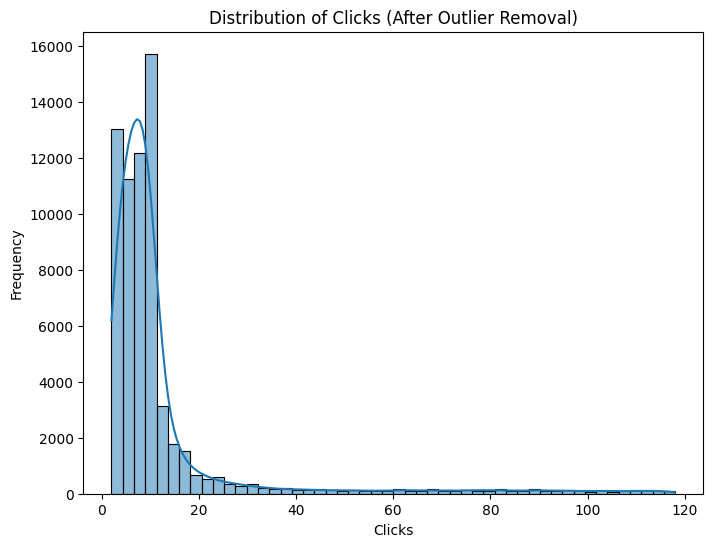

In [606]:
plt.figure(figsize=(8, 6))
sns.histplot(click_values_filtered, bins=50, kde=True)
plt.title('Distribution of Clicks (After Outlier Removal)')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()


In [607]:
# Keep only the rows where clicks are below the threshold
df = df[df['clicks'] <= threshold]
print(f"Filtered Dataset Shape: {df.shape}")


Filtered Dataset Shape: (65749, 37)


In [608]:
# 2. Classification Approach: Binning into 5 Engagement Levels
bins = [0, 20, 50, 80, 120, float('inf')]
labels = [0, 1, 2, 3, 4]  # 5 engagement levels
df['clicks_category'] = pd.cut(df['clicks'], bins=bins, labels=labels, right=False)

# Verify classification
print('\nCategorized Clicks:')
print(df[['clicks', 'clicks_category']].head())

print('✅ Clicks processed for both regression and classification scenarios.')


Categorized Clicks:
   clicks clicks_category
0       8               0
1      44               1
2      32               1
3      48               1
4      20               1
✅ Clicks processed for both regression and classification scenarios.


In [609]:
# Save the final DataFrame to a CSV file
final_csv_path = '../Datasets/processed_data.csv'
df.to_csv(final_csv_path, index=False)

print(f"Final DataFrame saved to {final_csv_path}")

Final DataFrame saved to ../Datasets/processed_data.csv
